In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv("delhi_waste_management.csv")

In [96]:
df.isnull().sum()

record_id               0
date                    0
ward_no                 0
waste_type              0
waste_weight_kg         0
bin_fill_level          0
recycled_weight_kg      0
landfill_weight_kg      0
collection_route        0
collection_time_mins    0
cost_per_trip           0
dtype: int64

In [97]:
df.fillna(0,inplace=True)

In [98]:
waste_per_ward = df.groupby("ward_no")["waste_weight_kg"].sum()
waste_per_ward

ward_no
1     1143.56
2     1576.94
3     1911.49
4     2098.46
5     1575.30
6     1580.06
7      926.15
8     1514.02
9      508.89
10    1797.01
11    1851.48
12    1244.54
13     875.53
14     266.32
15    1903.82
16    1160.54
17    1137.44
18    1760.21
19    1423.90
20     965.42
Name: waste_weight_kg, dtype: float64

In [99]:
bin_fill_mean = df.groupby("ward_no")["bin_fill_level"].sum()
bin_fill_mean

ward_no
1     280
2     393
3     501
4     498
5     376
6     447
7     258
8     431
9     304
10    429
11    449
12    407
13    206
14     93
15    445
16    324
17    477
18    332
19    447
20    331
Name: bin_fill_level, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

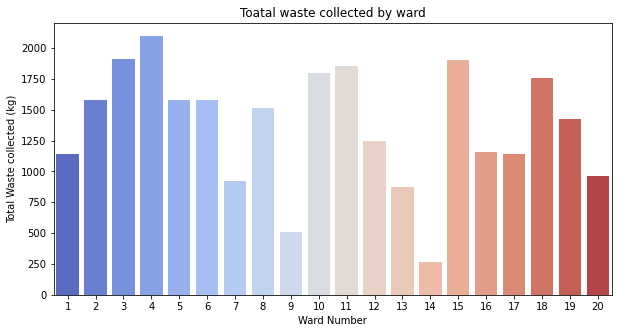

In [100]:
plt.figure(figsize = (10,5))
sns.barplot(x = waste_per_ward.index, y = waste_per_ward.values, palette="coolwarm")
plt.title("Toatal waste collected by ward")
plt.xlabel("Ward Number")
plt.ylabel("Total Waste collected (kg)")
plt.show

In [101]:
waste_type_distribution = df.groupby("waste_type")["waste_weight_kg"].sum()
waste_type_distribution

waste_type
E-Waste    5503.72
Glass      3159.89
Metal      3192.64
Organic    4840.59
Paper      3888.80
Plastic    6635.44
Name: waste_weight_kg, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

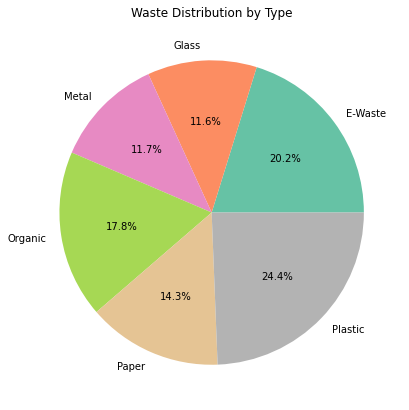

In [102]:
plt.figure(figsize = (7,7))
waste_type_distribution.plot(kind = "pie", autopct ="%1.1f%%", cmap="Set2")
plt.title("Waste Distribution by Type")
plt.ylabel("")
plt.show

PREDICTING FUTURE WASTE GENERATION - MACHINE LEARNING

In [103]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler


In [104]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(Xscaled, Y, test_size=0.3, random_state=42)

Xtrain = np.c_[np.ones(Xtrain.shape[0]), Xtrain]
Xtest = np.c_[np.ones(Xtest.shape[0]), Xtest]

def compute_cost(X, y, m):
    N = len(y)
    predictions = np.dot(X, m)
    return np.sum((predictions - y) ** 2) / N

def gradient_descent(X, y, learning_rate=0.01, num_iterations=5000, tolerance=1e-6):
    m = np.zeros(X.shape[1])
    prev_cost = float("inf")

    for i in range(num_iterations):
        predictions = np.dot(X, m)
        error = predictions - y
        gradient = (1 / len(y)) * np.dot(X.T, error)
        m -= learning_rate * gradient

        cost = compute_cost(X, y, m)
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost

    return m

m = gradient_descent(Xtrain, ytrain)

ypred = np.dot(Xtest, m)

mae = mean_absolute_error(ytest, ypred)
rmse = np.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred)

mae,r2,rmse

(123.0241801504191, -0.11685761244853077, 138.9667259599183)

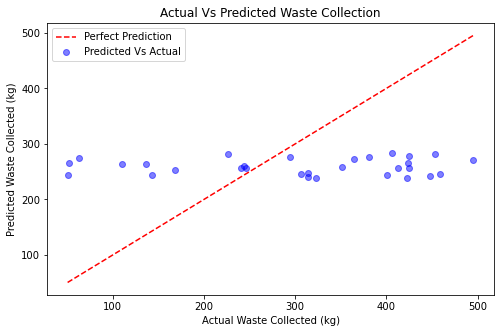

In [105]:
plt.figure(figsize = (8,5))
plt.scatter(ytest,ypred,color="blue",alpha=0.5, label ="Predicted Vs Actual")
plt.plot([min(ytest),max(ytest)],[min(ytest), max(ytest)], color="red",linestyle ="dashed",label="Perfect Prediction")
plt.xlabel("Actual Waste Collected (kg)")
plt.ylabel("Predicted Waste Collected (kg)")
plt.title("Actual Vs Predicted Waste Collection")
plt.legend()
plt.show()

In [106]:
future_X = pd.DataFrame({
    "ward_no": np.random.randint(1,21,10),
    "bin_fill_level": np.random.randint(50,100,10),
    "collection_time_mins": np.random.randint(30,120,10)
})

future_pred = model.predict(future_X)

future_df = future_X.copy()
future_df["Predicted_Waste_kg"] = future_pred
print(future_df)

   ward_no  bin_fill_level  collection_time_mins  Predicted_Waste_kg
0        6              89                   107          272.395592
1       16              95                    45          273.832409
2       18              56                    99          239.412494
3        9              76                   110          260.121526
4        6              72                    35          260.274849
5       19              94                    61          271.080338
6        1              81                    82          269.001802
7       12              52                    45          240.551576
8       18              81                   118          259.456466
9        5              91                   101          274.698599
